In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel(r'C:\Users\basia\OneDrive\Pulpit\DTU\ML\diabetes_dataset.xlsx')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              0      102             52              0        0  25.1   
1              6       87             80              0        0  23.2   
2              2       90             70             17        0  27.3   
3              6       92             62             32      126  32.0   
4              2      125             60             20      140  33.8   
..           ...      ...            ...            ...      ...   ...   
763            0      146             82              0        0  40.5   
764            0      180             66             39        0  42.0   
765            3      173             82             48      465  38.4   
766            0      137             40             35      168  43.1   
767            4      197             70             39      744  36.7   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.078   21        0  
1                  

In [3]:
df.columns[0:8]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [4]:
df = pd.DataFrame(df)
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,0,146,82,0,0,40.5,1.781,44,0
764,0,180,66,39,0,42.0,1.893,25,1
765,3,173,82,48,465,38.4,2.137,25,1
766,0,137,40,35,168,43.1,2.288,33,1
767,4,197,70,39,744,36.7,2.329,31,0


In [5]:
df= df[df['SkinThickness'] != 0]
df= df[df['Insulin'] != 0]
df= df[df['Pregnancies']/df['Age'] < 0.5]
df= df[df['BloodPressure'] >20]
df= df[df['BloodPressure']<180]
df= df[df['Glucose'] >50]
df= df[df['Glucose']<160]
df= df[df['BMI']>15]
df= df[df['BMI']<50]


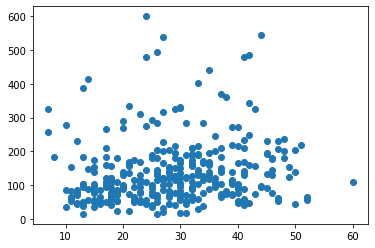

In [7]:
plt.scatter(df['SkinThickness'], df["Insulin"],  label='SkinThickness')


In [6]:
 df.to_excel('output.xlsx',index=True)

In [7]:
print(df.shape)
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]


(334, 9)


In [8]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the features


In [10]:
pca = PCA(n_components=8)
X2D = pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
component = np.arange(1,cumsum.shape[0]+1,1)

In [10]:
X

array([[ 0.87051467, -0.95780953, -0.66749892, ..., -0.05424187,
        -1.33636412,  1.68026732],
       [-0.39225145,  0.50417311, -0.83424883, ...,  0.2271232 ,
        -1.32678849,  0.11001191],
       [-1.02363452,  0.14975308,  0.83325033, ...,  2.009102  ,
        -1.32359662, -0.62277395],
       ...,
       [-1.02363452,  0.63708062, -0.16724917, ..., -0.28871276,
         2.8322265 , -0.51809026],
       [-0.39225145, -1.40083457, -1.5012485 , ..., -0.60134062,
         3.81532445, -0.51809026],
       [-1.02363452,  1.03580316, -2.501748  , ...,  1.68084275,
         5.69533967,  0.3193793 ]])

[0.32180252 0.50735983 0.65815429 0.78679294 0.87809158 0.93134665
 0.9684253  1.        ]
[1 2 3 4 5 6 7 8]


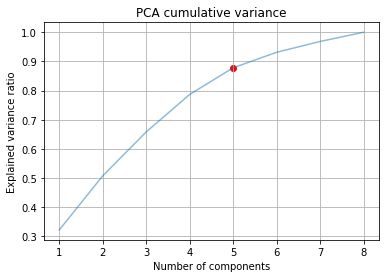

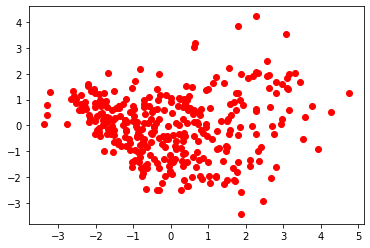

In [29]:
print(cumsum)
print(component)
plt.plot(component,cumsum, alpha = 0.5)
plt.scatter(5,cumsum[4],color = 'r') # plotting the "optimal number of components"
plt.xlabel('Number of components')
plt.title("PCA cumulative variance")
plt.ylabel('Explained variance ratio')
plt.grid()
plt.show()

#20 values below 90% of variance 
pca = PCA(n_components=0.8)
Z = pca.fit_transform(X)
plt.scatter(X2D[:,0],X2D[:,1], color = 'r')

In [12]:
Z.shape

(334, 5)

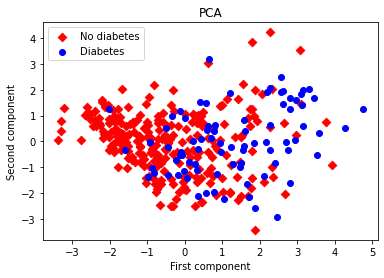

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show
plt.scatter(Z[:,0][(df.Outcome == 0)],
            Z[:,1][(df.Outcome == 0)],
           marker='D',
           color='red',
           label='No diabetes')
plt.scatter(Z[:,0][(df.Outcome == 1)],
            Z[:,1][(df.Outcome == 1)],
           marker='o',
           color='blue',
           label='Diabetes')


plt.xlabel('First component')
plt.ylabel('Second component')
plt.title("PCA")
plt.legend()
plt.show()

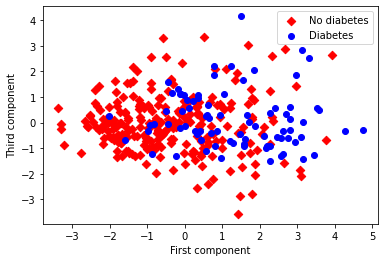

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show
plt.scatter(Z[:,0][(df.Outcome == 0)],
            Z[:,2][(df.Outcome == 0)],
           marker='D',
           color='red',
           label='No diabetes')
plt.scatter(Z[:,0][(df.Outcome == 1)],
            Z[:,2][(df.Outcome == 1)],
           marker='o',
           color='blue',
           label='Diabetes')


plt.xlabel('First component')
plt.ylabel('Third component')
plt.legend()
plt.show()

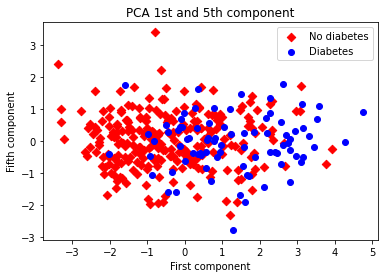

In [32]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show
plt.scatter(Z[:,0][(df.Outcome == 0)],
            Z[:,4][(df.Outcome == 0)],
           marker='D',
           color='red',
           label='No diabetes')
plt.scatter(Z[:,0][(df.Outcome == 1)],
            Z[:,4][(df.Outcome == 1)],
           marker='o',
           color='blue',
           label='Diabetes')


plt.xlabel('First component')
plt.ylabel('Fifth component')
plt.title('PCA 1st and 5th component')
plt.legend()
plt.show()

Certainly! This code is performing Principal Component Analysis (PCA) using scikit-learn's implementation to reduce the dimensionality of a dataset while retaining more than 90% of the variance in the data. Here's a step-by-step explanation of the code. Here, a PCA object is created with the n_components parameter set to 8. This means that initially, the PCA will reduce the dimensionality to 8 components. This is a higher dimension than is needed for retaining 90% of the variance.The fit_transform method is called on the PCA object (pca) with the input data X. This step applies PCA to the dataset X, reducing its dimensionality to 8 components and storing the transformed data in X2D. This line cumsum = np.cumsum(pca.explained_variance_ratio_) calculates the cumulative sum of explained variance ratios. explained_variance_ratio_ contains the proportion of the dataset's total variance explained by each principal component.

The plot plots cumulative explained variance against the component numbers. It provides a visual representation of how much variance is retained as the number of components increases.

This block of code creates a new PCA object with n_components set to 0.9, which means it will retain enough components to explain 90% or more of the variance in the data. It then applies PCA to the data X and stores the transformed data in Z.

Last line creates a scatter plot of the transformed data X2D. In this case, it's only showing the first two components of the reduced data.

Overall, the code provides a visual analysis of PCA, helping you understand how the cumulative explained variance changes with the number of components and how to select an appropriate number of components to retain a desired amount of variance.

In [16]:
#Creating dataframe with 5 componontes 

df_PCA = pd.DataFrame(data = Z
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])


In [17]:
df_PCA.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,0.419917,0.964521,-1.224583,-0.549633,1.691390
1,-0.521476,0.263739,0.628976,-1.059014,0.816035
2,0.025325,-1.890290,-0.827994,-1.589440,-0.318645
3,-1.320310,-0.788752,-1.316967,-1.326091,-0.340208
4,-1.201910,1.021249,0.221240,-1.402862,-0.425018


In [18]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.32180252 0.18555731 0.15079447 0.12863864 0.09129864]


In [19]:
#That means that 2-D square of PCA1 and PCA2 will be less than 50% approximatation of the data

Here we can summerize that pricipal component 1 holds 25% of variance, 2 holds 21.7%, 3 holds 13%, 4 holds 11.6% and 5 holds 9%

Finding principal directions:

In [34]:
principal_directions = pca.components_
principal_directions=pd.DataFrame(data=principal_directions, columns=df.columns[0:8])
principal_directions.index = np.arange(1, len(principal_directions) + 1)
principal_directions
#values of each principal directions for attributes for each PCA component
#Eigenvalues represent the total amount of variance that can be explained by a given principal component
#COmponent loadings represent the amount of variance in each item that can be explained by the principal component.
#Those are the distances to the projected line, sum of squared distances get the variance for each PCA component
#The important features are the ones that influence more the components and thus, have a large absolute value on the component.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,0.384649,0.396300,0.333725,0.369528,0.344101,0.347990,0.093876,0.445818
2,0.489175,0.093381,0.004857,-0.501125,-0.039407,-0.577218,-0.067702,0.401896
3,-0.248250,0.535934,-0.302331,-0.233148,0.642978,-0.149298,0.101336,-0.243732
4,0.074149,-0.118432,-0.335171,0.058996,-0.102648,-0.012851,0.913395,0.140224
5,0.297291,-0.092244,-0.809482,0.275725,0.051402,0.127815,-0.364909,0.140305


In [21]:
pca.n_components_


5

In [22]:
principal_directions.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

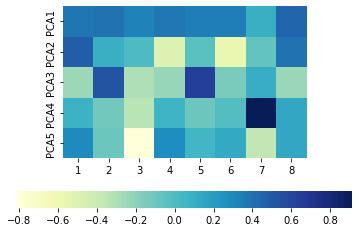

In [23]:
import seaborn as sns
ax = sns.heatmap(principal_directions,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list([1,2,3,4,5,6,7,8]),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [24]:
#in the example of PCA1 (row 0), it tells us that attributes 0 and 6 in terms of how they are projected, they are less importnant then the others

In [25]:
variance=0
for i in principal_directions.loc[0,:]:
    variance+=i**2
    print(variance)

0.1479549065792282
0.30500825813168514
0.41638053207830966
0.5529311635936375
0.671336612196968
0.7924334993118419
0.8012462582859317
1.0000000000000004


In [26]:
#Larger magnitude coefficients suggest that the corresponding variable has a stronger influence on that principal direction.


Finding data projected

In [27]:
PCA_data=pd.DataFrame(data=Z)
PCA_data

,0,1,2,3,4
0,0.419917,0.964521,-1.224583,-0.549633,1.691390
1,-0.521476,0.263739,0.628976,-1.059014,0.816035
2,0.025325,-1.890290,-0.827994,-1.589440,-0.318645
3,-1.320310,-0.788752,-1.316967,-1.326091,-0.340208
4,-1.201910,1.021249,0.221240,-1.402862,-0.425018
...,...,...,...,...,...
329,1.286967,-0.865981,-0.813703,1.675349,-2.781941
330,3.150190,2.005839,0.030131,2.564645,-0.512846
331,-0.450012,-0.233773,1.598198,2.323633,-1.600727
332,-1.603111,-0.126309,0.394458,4.047737,-0.498873
